# Homework 2

### Importing the libraries into python

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
%matplotlib inline

### Importing the dataset into python

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df = pd.read_csv("hw2_dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Columns: 1025 entries, ID to D_1023
dtypes: int64(1024), object(1)
memory usage: 7.6+ MB


### Preprocessing the dataset
From the df.info() function I am able to find out that most of the data inside the document are in the form of integers with one of them being a charater or string column

In [3]:
df.head()

,ID,D_0,D_1,D_2,D_3,D_4,D_5,D_6,D_7,D_8,D_9,D_10,D_11,D_12,D_13,D_14,D_15,D_16,D_17,D_18,D_19,D_20,D_21,D_22,D_23,D_24,D_25,D_26,D_27,D_28,D_29,D_30,D_31,D_32,D_33,D_34,D_35,D_36,D_37,D_38,D_39,D_40,D_41,D_42,D_43,D_44,D_45,D_46,D_47,D_48,D_49,D_50,D_51,D_52,D_53,D_54,D_55,D_56,D_57,D_58,D_59,D_60,D_61,D_62,D_63,D_64,D_65,D_66,D_67,D_68,D_69,D_70,D_71,D_72,D_73,D_74,D_75,D_76,D_77,D_78,D_79,D_80,D_81,D_82,D_83,D_84,D_85,D_86,D_87,D_88,D_89,D_90,D_91,D_92,D_93,D_94,D_95,D_96,D_97,D_98,D_99,D_100,D_101,D_102,D_103,D_104,D_105,D_106,D_107,D_108,D_109,D_110,D_111,D_112,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,D_130,D_131,D_132,D_133,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,D_146,D_147,D_148,D_149,D_150,D_151,D_152,D_153,D_154,D_155,D_156,D_157,D_158,D_159,D_160,D_161,D_162,D_163,D_164,D_165,D_166,D_167,D_168,D_169,D_170,D_171,D_172,D_173,D_174,D_175,D_176,D_177,D_178,D_179,D_180,D_181,D_182,D_183,D_184,D_185,D_186,D_187,D_188,D_189,D_190,D_191,D_192,D_193,D_194,D_195,D_196,D_197,D_198,D_199,D_200,D_201,D_202,D_203,D_204,D_205,D_206,D_207,D_208,D_209,D_210,D_211,D_212,D_213,D_214,D_215,D_216,D_217,D_218,D_219,D_220,D_221,D_222,D_223,D_224,D_225,D_226,D_227,D_228,D_229,D_230,D_231,D_232,D_233,D_234,D_235,D_236,D_237,D_238,D_239,D_240,D_241,D_242,D_243,D_244,D_245,D_246,D_247,D_248,D_249,D_250,D_251,D_252,D_253,D_254,D_255,D_256,D_257,D_258,D_259,D_260,D_261,D_262,D_263,D_264,D_265,D_266,D_267,D_268,D_269,D_270,D_271,D_272,D_273,D_274,D_275,D_276,D_277,D_278,D_279,D_280,D_281,D_282,D_283,D_284,D_285,D_286,D_287,D_288,D_289,D_290,D_291,D_292,D_293,D_294,D_295,D_296,D_297,D_298,D_299,D_300,D_301,D_302,D_303,D_304,D_305,D_306,D_307,D_308,D_309,D_310,D_311,D_312,D_313,D_314,D_315,D_316,D_317,D_318,D_319,D_320,D_321,D_322,D_323,D_324,D_325,D_326,D_327,D_328,D_329,D_330,D_331,D_332,D_333,D_334,D_335,D_336,D_337,D_338,D_339,D_340,D_341,D_342,D_343,D_344,D_345,D_346,D_347,D_348,D_349,D_350,D_351,D_352,D_353,D_354,D_355,D_356,D_357,D_358,D_359,D_360,D_361,D_362,D_363,D_364,D_365,D_366,D_367,D_368,D_369,D_370,D_371,D_372,D_373,D_374,D_375,D_376,D_377,D_378,D_379,D_380,D_381,D_382,D_383,D_384,D_385,D_386,D_387,D_388,D_389,D_390,D_391,D_392,D_393,D_394,D_395,D_396,D_397,D_398,D_399,D_400,D_401,D_402,D_403,D_404,D_405,D_406,D_407,D_408,D_409,D_410,D_411,D_412,D_413,D_414,D_415,D_416,D_417,D_418,D_419,D_420,D_421,D_422,D_423,D_424,D_425,D_426,D_427,D_428,D_429,D_430,D_431,D_432,D_433,D_434,D_435,D_436,D_437,D_438,D_439,D_440,D_441,D_442,D_443,D_444,D_445,D_446,D_447,D_448,D_449,D_450,D_451,D_452,D_453,D_454,D_455,D_456,D_457,D_458,D_459,D_460,D_461,D_462,D_463,D_464,D_465,D_466,D_467,D_468,D_469,D_470,D_471,D_472,D_473,D_474,D_475,D_476,D_477,D_478,D_479,D_480,D_481,D_482,D_483,D_484,D_485,D_486,D_487,D_488,D_489,D_490,D_491,D_492,D_493,D_494,D_495,D_496,D_497,D_498,D_499,D_500,D_501,D_502,D_503,D_504,D_505,D_506,D_507,D_508,D_509,D_510,D_511,D_512,D_513,D_514,D_515,D_516,D_517,D_518,D_519,D_520,D_521,D_522,D_523,D_524,D_525,D_526,D_527,D_528,D_529,D_530,D_531,D_532,D_533,D_534,D_535,D_536,D_537,D_538,D_539,D_540,D_541,D_542,D_543,D_544,D_545,D_546,D_547,D_548,D_549,D_550,D_551,D_552,D_553,D_554,D_555,D_556,D_557,D_558,D_559,D_560,D_561,D_562,D_563,D_564,D_565,D_566,D_567,D_568,D_569,D_570,D_571,D_572,D_573,D_574,D_575,D_576,D_577,D_578,D_579,D_580,D_581,D_582,D_583,D_584,D_585,D_586,D_587,D_588,D_589,D_590,D_591,D_592,D_593,D_594,D_595,D_596,D_597,D_598,D_599,D_600,D_601,D_602,D_603,D_604,D_605,D_606,D_607,D_608,D_609,D_610,D_611,D_612,D_613,D_614,D_615,D_616,D_617,D_618,D_619,D_620,D_621,D_622,D_623,D_624,D_625,D_626,D_627,D_628,D_629,D_630,D_631,D_632,D_633,D_634,D_635,D_636,D_637,D_638,D_639,D_640,D_641,D_642,D_643,D_644,D_645,D_646,D_647,D_648,D_649,D_650,D_651,D_652,D_653,D_654,D_655,D_656,D_657,D_658,D_659,D_660,D_661,D_662,D_663,D_664,D_665,D_666,D_667,D_668,D_669,D_670,D_671,D_672,D_673,D_674,D_675,D_676,D_677,D_678,D_679,D_680,D_681,D_682,D_683,D_

From performing df.head it can be seen that the column that has characters is the ID column. I will now find the number of unique elements inside that column to check whether all the items in that column are unique if they are unique then that means that they will not be a great addition to the prediction model.

In [4]:
df.ID.nunique()

969

As there are 969 unique variables in the ID column it can be said that we can actually reduce that column to make it a cleaner dataset

In [5]:
df = df.drop("ID", axis = 1)
df.head()

,D_0,D_1,D_2,D_3,D_4,D_5,D_6,D_7,D_8,D_9,D_10,D_11,D_12,D_13,D_14,D_15,D_16,D_17,D_18,D_19,D_20,D_21,D_22,D_23,D_24,D_25,D_26,D_27,D_28,D_29,D_30,D_31,D_32,D_33,D_34,D_35,D_36,D_37,D_38,D_39,D_40,D_41,D_42,D_43,D_44,D_45,D_46,D_47,D_48,D_49,D_50,D_51,D_52,D_53,D_54,D_55,D_56,D_57,D_58,D_59,D_60,D_61,D_62,D_63,D_64,D_65,D_66,D_67,D_68,D_69,D_70,D_71,D_72,D_73,D_74,D_75,D_76,D_77,D_78,D_79,D_80,D_81,D_82,D_83,D_84,D_85,D_86,D_87,D_88,D_89,D_90,D_91,D_92,D_93,D_94,D_95,D_96,D_97,D_98,D_99,D_100,D_101,D_102,D_103,D_104,D_105,D_106,D_107,D_108,D_109,D_110,D_111,D_112,D_113,D_114,D_115,D_116,D_117,D_118,D_119,D_120,D_121,D_122,D_123,D_124,D_125,D_126,D_127,D_128,D_129,D_130,D_131,D_132,D_133,D_134,D_135,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,D_146,D_147,D_148,D_149,D_150,D_151,D_152,D_153,D_154,D_155,D_156,D_157,D_158,D_159,D_160,D_161,D_162,D_163,D_164,D_165,D_166,D_167,D_168,D_169,D_170,D_171,D_172,D_173,D_174,D_175,D_176,D_177,D_178,D_179,D_180,D_181,D_182,D_183,D_184,D_185,D_186,D_187,D_188,D_189,D_190,D_191,D_192,D_193,D_194,D_195,D_196,D_197,D_198,D_199,D_200,D_201,D_202,D_203,D_204,D_205,D_206,D_207,D_208,D_209,D_210,D_211,D_212,D_213,D_214,D_215,D_216,D_217,D_218,D_219,D_220,D_221,D_222,D_223,D_224,D_225,D_226,D_227,D_228,D_229,D_230,D_231,D_232,D_233,D_234,D_235,D_236,D_237,D_238,D_239,D_240,D_241,D_242,D_243,D_244,D_245,D_246,D_247,D_248,D_249,D_250,D_251,D_252,D_253,D_254,D_255,D_256,D_257,D_258,D_259,D_260,D_261,D_262,D_263,D_264,D_265,D_266,D_267,D_268,D_269,D_270,D_271,D_272,D_273,D_274,D_275,D_276,D_277,D_278,D_279,D_280,D_281,D_282,D_283,D_284,D_285,D_286,D_287,D_288,D_289,D_290,D_291,D_292,D_293,D_294,D_295,D_296,D_297,D_298,D_299,D_300,D_301,D_302,D_303,D_304,D_305,D_306,D_307,D_308,D_309,D_310,D_311,D_312,D_313,D_314,D_315,D_316,D_317,D_318,D_319,D_320,D_321,D_322,D_323,D_324,D_325,D_326,D_327,D_328,D_329,D_330,D_331,D_332,D_333,D_334,D_335,D_336,D_337,D_338,D_339,D_340,D_341,D_342,D_343,D_344,D_345,D_346,D_347,D_348,D_349,D_350,D_351,D_352,D_353,D_354,D_355,D_356,D_357,D_358,D_359,D_360,D_361,D_362,D_363,D_364,D_365,D_366,D_367,D_368,D_369,D_370,D_371,D_372,D_373,D_374,D_375,D_376,D_377,D_378,D_379,D_380,D_381,D_382,D_383,D_384,D_385,D_386,D_387,D_388,D_389,D_390,D_391,D_392,D_393,D_394,D_395,D_396,D_397,D_398,D_399,D_400,D_401,D_402,D_403,D_404,D_405,D_406,D_407,D_408,D_409,D_410,D_411,D_412,D_413,D_414,D_415,D_416,D_417,D_418,D_419,D_420,D_421,D_422,D_423,D_424,D_425,D_426,D_427,D_428,D_429,D_430,D_431,D_432,D_433,D_434,D_435,D_436,D_437,D_438,D_439,D_440,D_441,D_442,D_443,D_444,D_445,D_446,D_447,D_448,D_449,D_450,D_451,D_452,D_453,D_454,D_455,D_456,D_457,D_458,D_459,D_460,D_461,D_462,D_463,D_464,D_465,D_466,D_467,D_468,D_469,D_470,D_471,D_472,D_473,D_474,D_475,D_476,D_477,D_478,D_479,D_480,D_481,D_482,D_483,D_484,D_485,D_486,D_487,D_488,D_489,D_490,D_491,D_492,D_493,D_494,D_495,D_496,D_497,D_498,D_499,D_500,D_501,D_502,D_503,D_504,D_505,D_506,D_507,D_508,D_509,D_510,D_511,D_512,D_513,D_514,D_515,D_516,D_517,D_518,D_519,D_520,D_521,D_522,D_523,D_524,D_525,D_526,D_527,D_528,D_529,D_530,D_531,D_532,D_533,D_534,D_535,D_536,D_537,D_538,D_539,D_540,D_541,D_542,D_543,D_544,D_545,D_546,D_547,D_548,D_549,D_550,D_551,D_552,D_553,D_554,D_555,D_556,D_557,D_558,D_559,D_560,D_561,D_562,D_563,D_564,D_565,D_566,D_567,D_568,D_569,D_570,D_571,D_572,D_573,D_574,D_575,D_576,D_577,D_578,D_579,D_580,D_581,D_582,D_583,D_584,D_585,D_586,D_587,D_588,D_589,D_590,D_591,D_592,D_593,D_594,D_595,D_596,D_597,D_598,D_599,D_600,D_601,D_602,D_603,D_604,D_605,D_606,D_607,D_608,D_609,D_610,D_611,D_612,D_613,D_614,D_615,D_616,D_617,D_618,D_619,D_620,D_621,D_622,D_623,D_624,D_625,D_626,D_627,D_628,D_629,D_630,D_631,D_632,D_633,D_634,D_635,D_636,D_637,D_638,D_639,D_640,D_641,D_642,D_643,D_644,D_645,D_646,D_647,D_648,D_649,D_650,D_651,D_652,D_653,D_654,D_655,D_656,D_657,D_658,D_659,D_660,D_661,D_662,D_663,D_664,D_665,D_666,D_667,D_668,D_669,D_670,D_671,D_672,D_673,D_674,D_675,D_676,D_677,D_678,D_679,D_680,D_681,D_682,D_683,D_684

Finding out if the variables has any null variables

In [6]:
for i in df.columns:
    if df[i].isna().sum()!=0:
        print(i,df[i].isna().sum())
df.describe()

D_0         D_1    D_2    D_3         D_4    D_5         D_6  \
count  969.0  969.000000  969.0  969.0  969.000000  969.0  969.000000   
mean     1.0    0.900929    1.0    1.0    0.684211    1.0    0.764706   
std      0.0    0.298912    0.0    0.0    0.465070    0.0    0.424402   
min      1.0    0.000000    1.0    1.0    0.000000    1.0    0.000000   
25%      1.0    1.000000    1.0    1.0    0.000000    1.0    1.000000   
50%      1.0    1.000000    1.0    1.0    1.000000    1.0    1.000000   
75%      1.0    1.000000    1.0    1.0    1.000000    1.0    1.000000   
max      1.0    1.000000    1.0    1.0    1.000000    1.0    1.000000   

             D_7         D_8         D_9        D_10        D_11        D_12  \
count  969.00000  969.000000  969.000000  969.000000  969.000000  969.000000   
mean     0.68937    0.570691    0.373581    0.694530    0.662539    0.527348   
std      0.46299    0.495233    0.484004    0.460844    0.473088    0.499509   
min      0.00000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.00000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      1.00000    1.000000    0.000000    1.000000    1.000000    1.000000   
75%      1.00000    1.000000    1.000000    1.000000    1.000000    1.000000   
max      1.00000    1.000000    1.000000    1.000000    1.000000    1.000000   

             D_13        D_14        D_15        D_16        D_17        D_18  \
count  969.000000  969.000000  969.000000  969.000000  969.000000  969.000000   
mean     0.881321    0.886481    0.429309    0.919505    0.597523    0.818369   
std      0.323577    0.317390    0.495233    0.272199    0.490650    0.385739   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000    1.000000    0.000000    1.000000    0.000000    1.000000   
50%      1.000000    1.000000    0.000000    1.000000    1.000000    1.000000   
75%      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

             D_19        D_20        D_21        D_22        D_23        D_24  \
count  969.000000  969.000000  969.000000  969.000000  969.000000  969.000000   
mean     0.744066    0.641899    0.691434    0.583075    0.950464    0.597523   
std      0.436610    0.479690    0.462140    0.493305    0.217096    0.490650   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
75%      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

             D_25        D_26        D_27        D_28   D_29        D_30  \
count  969.000000  969.000000  969.000000  969.000000  969.0  969.000000   
mean     0.894737    0.860681    0.847265    0.505676    1.0    0.827657   
std      0.307051    0.346458    0.359917    0.500226    0.0    0.377873   
min      0.000000    0.000000    0.000000    0.000000    1.0    0.000000   
25%      1.000000    1.000000    1.000000    0.000000    1.0    1.000000   
50%      1.000000    1.000000    1.000000    1.000000    1.0    1.000000   
75%      1.000000    1.000000    1.000000    1.000000    1.0    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.0    1.000000   

             D_31   D_32        D_33        D_34        D_35   D_36  \
count  969.000000  969.0  969.000000  969.000000  969.000000  969.0   
mean     0.652219    1.0    0.784314    0.837977    0.623323    1.0   
std      0.476512    0.0    0.411510    0.368662    0.484803    0.0   
min      0.000000    1.0    0.000000    0.000000    0.000000    1.0   
25%      0.000000    1.0    1.000000    1.000000    0.000000    1.0   
50%      1.000000    1.0    1.000000    1.000000    1.00000

From this it can be seen that the dataset contains no null values and the values in the column that are there only have values that range from 0 to 1. I can also see that there are some columns that show no variation as it only has a value of just 1. So now to find out those columns

In [7]:
only1 = []
for k in df.columns:
    if df[k].nunique()==1:
        only1.append(k)

['D_0',
 'D_2',
 'D_3',
 'D_5',
 'D_29',
 'D_32',
 'D_36',
 'D_64',
 'D_70',
 'D_103',
 'D_104',
 'D_153',
 'D_160',
 'D_161',
 'D_171',
 'D_172',
 'D_180',
 'D_194',
 'D_208',
 'D_246',
 'D_252',
 'D_255',
 'D_257',
 'D_258',
 'D_263',
 'D_276',
 'D_281',
 'D_282',
 'D_294',
 'D_296',
 'D_310',
 'D_330',
 'D_371',
 'D_381',
 'D_383',
 'D_400',
 'D_427',
 'D_432',
 'D_472',
 'D_499',
 'D_529',
 'D_544',
 'D_556',
 'D_573',
 'D_622',
 'D_626',
 'D_632',
 'D_633',
 'D_677',
 'D_684',
 'D_708',
 'D_717',
 'D_729',
 'D_735',
 'D_750',
 'D_760',
 'D_762',
 'D_786',
 'D_790',
 'D_792',
 'D_796',
 'D_838',
 'D_842',
 'D_843',
 'D_865',
 'D_872',
 'D_881',
 'D_883',
 'D_905',
 'D_917',
 'D_986',
 'D_991',
 'D_1013',
 'D_1016']

Now I am going to remove all the columns that only have one variable

In [8]:
df = df.drop(only1, axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Columns: 950 entries, D_1 to D_1023
dtypes: int64(950)
memory usage: 7.0 MB


In [20]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}

for k in range(1, 50):
	# Building and fitting the model
	kmeanModel = KMeans(n_clusters=k).fit(df)
	kmeanModel.fit(df)

	distortions.append(sum(np.min(cdist(df, kmeanModel.cluster_centers_,
										'euclidean'), axis=1)) / df.shape[0])
	inertias.append(kmeanModel.inertia_)

	mapping1[k] = sum(np.min(cdist(df, kmeanModel.cluster_centers_,
								'euclidean'), axis=1)) / df.shape[0]
	mapping2[k] = kmeanModel.inertia_


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Wi

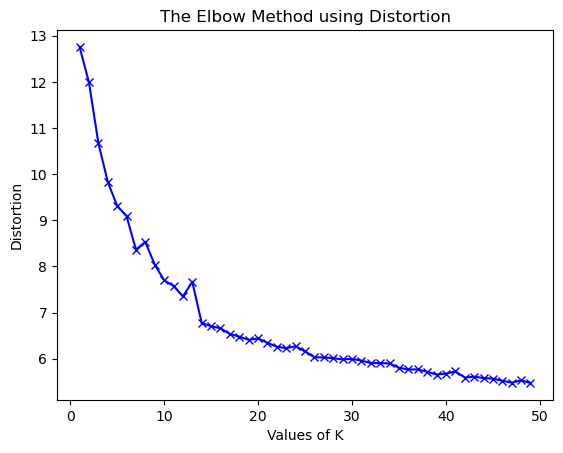

In [21]:
plt.plot(range(1,50), distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

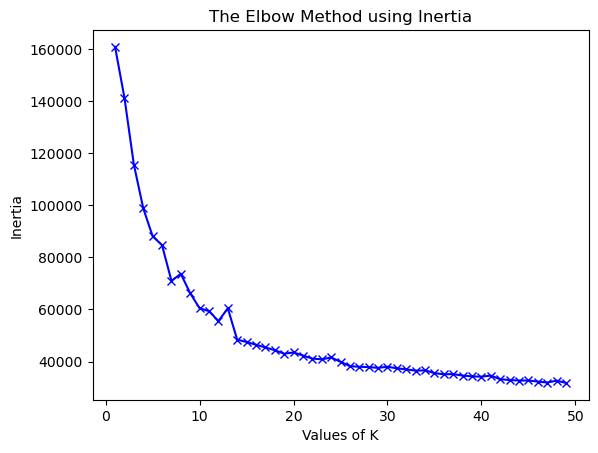

In [22]:
plt.plot(range(1,50), inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

From the above graphs it can be seen that it elbows at around the point when K is equal to 14 (i.e. the value of gradient substantially reduces). So I will take the number of clusters as 14 for further processing.

In [29]:
kmeans = KMeans(n_clusters=14, random_state=42)
kmeans.fit(df)

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


KMeans(n_clusters=14, random_state=42)

In [30]:
kmeans.cluster_centers_

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 0.02238806, 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.24489796, 0.10204082, 0.2244898 , ..., 0.2244898 , 0.08163265,
        0.95918367],
       ...,
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.42857143, 0.28571429, 0.04081633, ..., 0.34693878, 0.08163265,
        0.44897959]])

In [31]:
kmeans.inertia_

49054.0171209345

In [32]:
from scipy.cluster.hierarchy import dendrogram

from sklearn.cluster import AgglomerativeClustering

In [33]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

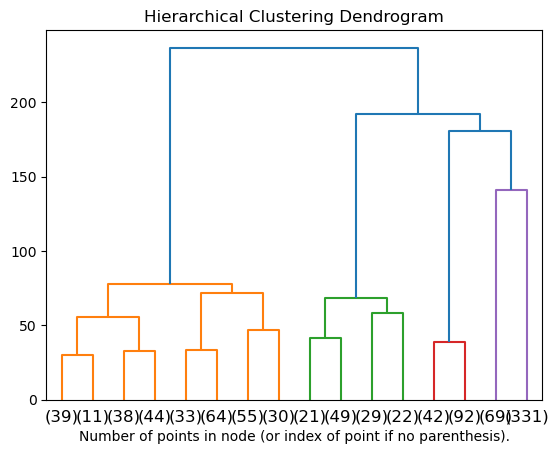

In [34]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(df)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [50]:
from sklearn.cluster import MiniBatchKMeans
import time
mbk = MiniBatchKMeans(
    init="k-means++",
    n_clusters=3,
    batch_size=45,
    n_init=10,
    max_no_improvement=10,
    verbose=0,
)
t0 = time.time()
mbk.fit(df)
t_mini_batch = time.time() - t0

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1972: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3584 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


In [51]:
kmeans = KMeans(n_clusters=14, random_state=42) 

In [52]:
kmeans.fit(df)

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


KMeans(n_clusters=14, random_state=42)

In [53]:
from time import time

from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


def bench_k_means(kmeans, name, data, labels):
    """Benchmark to evaluate the KMeans initialization methods.

    Parameters
    ----------
    kmeans : KMeans instance
        A :class:`~sklearn.cluster.KMeans` instance with the initialization
        already set.
    name : str
        Name given to the strategy. It will be used to show the results in a
        table.
    data : ndarray of shape (n_samples, n_features)
        The data to cluster.
    labels : ndarray of shape (n_samples,)
        The labels used to compute the clustering metrics which requires some
        supervision.
    """
    t0 = time()
    estimator = make_pipeline(StandardScaler(), kmeans).fit(data)
    fit_time = time() - t0
    results = [name, fit_time, estimator[-1].inertia_]

    # Define the metrics which require only the true labels and estimator
    # labels
    clustering_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
        metrics.adjusted_rand_score,
        metrics.adjusted_mutual_info_score,
    ]
    results += [m(labels, estimator[-1].labels_) for m in clustering_metrics]

    # The silhouette score requires the full dataset
    results += [
        metrics.silhouette_score(
            data,
            estimator[-1].labels_,
            metric="euclidean",
            sample_size=300,
        )
    ]

    # Show the results
    formatter_result = (
        "{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}"
    )
    print(formatter_result.format(*results))

In [55]:

(n_samples, n_features), n_digits = df.shape, df.unique(labels).size

print(f"# digits: {n_digits}; # samples: {n_samples}; # features {n_features}")

AttributeError: 'DataFrame' object has no attribute 'unique'

In [54]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

print(82 * "_")
print("init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette")

kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="k-means++", data=df, labels=labels)

kmeans = KMeans(init="random", n_clusters=n_digits, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="random", data=df, labels=labels)

pca = PCA(n_components=n_digits).fit(df)
kmeans = KMeans(init=pca.components_, n_clusters=n_digits, n_init=1)
bench_k_means(kmeans=kmeans, name="PCA-based", data=df, labels=labels)

print(82 * "_")

__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette


NameError: name 'n_digits' is not defined